<a href="https://colab.research.google.com/github/fhenri/FinanceAnalysis/blob/main/InvestmentStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install yfinance pandas matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#def backtest_cash_strategy(ticker='^GSPC', starting_capital=100000, cash_allocation=0.15, start_date='1970-01-01', end_date='1985-01-01'):
def backtest_cash_strategy(ticker='^GSPC', starting_capital=100000, cash_allocation=0.10, start_date='1970-01-01', end_date=None):
    """
    Backtest an investment strategy with a fixed cash allocation

    Parameters:
    - ticker: Stock index ticker (default S&P 500)
    - cash_allocation: Percentage to keep in cash (default 0.1 or 10%)
    - start_date: Start date for backtest
    - end_date: End date for backtest (defaults to most recent data)

    Returns:
    - DataFrame with strategy performance
    - Performance metrics dictionary
    """

    # Download historical price data
    if end_date is None:
        end_date = pd.Timestamp.now().strftime('%Y-%m-%d')

    # Fetch historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Flatten MultiIndex to work with single ticker
    data_flat = data.xs(ticker, axis=1, level=1)

    # Initialize strategy tracking
    initial_investment = starting_capital
    cash_value = initial_investment * cash_allocation
    invested_value = initial_investment * (1 - cash_allocation)
    # Extract the closing price for the first date
    #first_close_price = data['Close'].loc[:, ticker].iloc[0]
    first_close_price = data_flat['Close'].iloc[0]
    shares_owned = invested_value / first_close_price

    # Track monthly performance
    monthly_data = []

    # Use closing prices at month end
    month_end_prices = data_flat['Close'].resample('ME').last()

    for date, price in month_end_prices.items():
        # Calculate current portfolio value
        current_stock_value = shares_owned * price
        total_portfolio_value = current_stock_value + cash_value

        # Rebalance to maintain cash allocation
        target_cash = total_portfolio_value * cash_allocation
        target_invested = total_portfolio_value * (1 - cash_allocation)

        # Adjust cash and stock positions
        cash_value = target_cash
        shares_to_hold = target_invested / price

        # Record monthly performance
        monthly_data.append({
            'Date': date,
            'Portfolio Value': total_portfolio_value,
            'Stock Value': current_stock_value,
            'Cash Value': cash_value,
            'Shares': shares_owned,
            'Stock Price': price
        })

        # Update shares owned for next iteration
        shares_owned = shares_to_hold

    # Convert to DataFrame
    performance = pd.DataFrame(monthly_data)
    performance['Date'] = pd.to_datetime(performance['Date'])
    performance.set_index('Date', inplace=True)

    # Calculate performance metrics
    total_return = (performance['Portfolio Value'].iloc[-1] / performance['Portfolio Value'].iloc[0] - 1) * 100
    annual_return = (1 + total_return/100) ** (12/len(performance)) - 1

    metrics = {
        'Total Return (%)': total_return,
        'Annualized Return (%)': annual_return * 100,
        'Initial Investment': initial_investment,
        'Final Portfolio Value': performance['Portfolio Value'].iloc[-1],
        'Maximum Portfolio Value': performance['Portfolio Value'].max(),
        'Minimum Portfolio Value': performance['Portfolio Value'].min()
    }

    return performance, metrics

In [ ]:
def plot_performance_and_compare(performance, metrics):

    starting_capital = metrics['Initial Investment']

    # Calculate buy-and-hold strategy
    buy_and_hold = performance.copy()
    buy_and_hold['Portfolio Value'] = (starting_capital / performance['Stock Price'].iloc[0]) * performance['Stock Price']

    # Visualization
    plt.figure(figsize=(12,6))
    plt.plot(performance.index, performance['Portfolio Value'].astype(float), label='Strategy Portfolio Value', color='blue')
    plt.plot(buy_and_hold.index, buy_and_hold['Portfolio Value'].astype(float), label='Buy & Hold Portfolio Value', color='orange', linestyle='--')
    plt.title('Portfolio Performance with 10% Cash Allocation')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("=========== Strategy Metrics ===========")
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    buy_and_hold_final = buy_and_hold['Portfolio Value'].iloc[-1]
    buy_and_hold_return = (buy_and_hold_final / starting_capital) * 100

    print("\n=========== Buy & Hold Metrics ===========")
    print(f"Final Portfolio Value: {buy_and_hold_final:.2f}")
    print(f"Total Return (%): {buy_and_hold_return:.2f}")

[*********************100%***********************]  1 of 1 completed


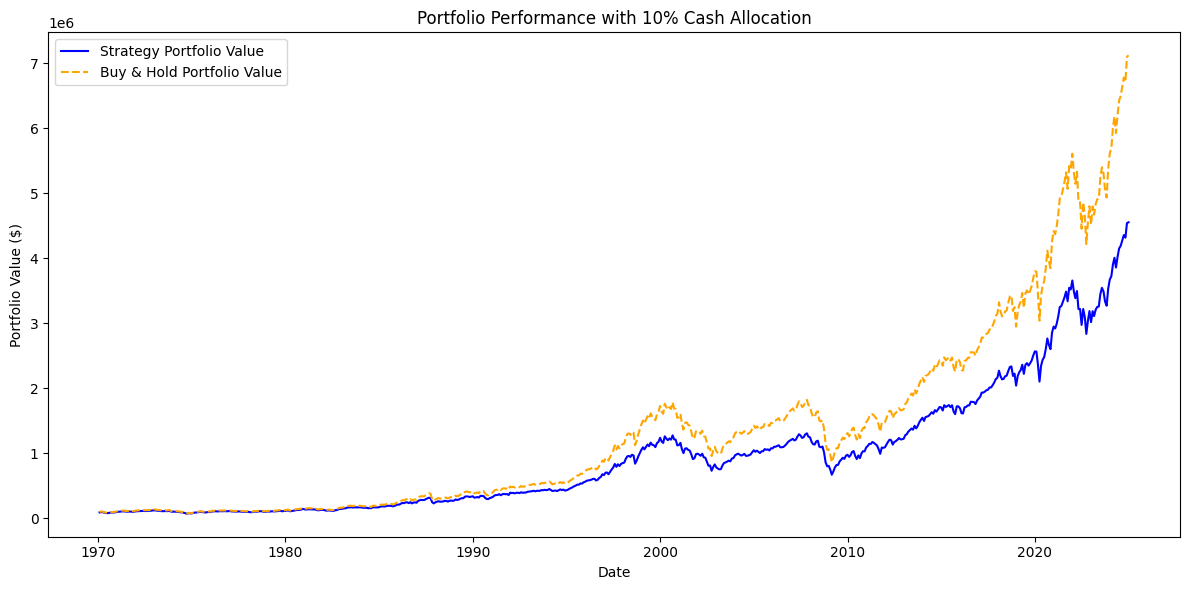

=========== Strategy Metrics ===========
Total Return (%): 4833.69
Annualized Return (%): 7.35
Initial Investment: 100000.00
Final Portfolio Value: 4552686.13
Maximum Portfolio Value: 4552686.13
Minimum Portfolio Value: 71365.90

=========== Buy & Hold Metrics ===========
Final Portfolio Value: 7119325.26
Total Return (%): 7119.33


In [ ]:
# Run the backtest
starting_capital=100000
performance, metrics = backtest_cash_strategy(starting_capital=starting_capital)

plot_performance_and_compare(performance, metrics)

[*********************100%***********************]  1 of 1 completed


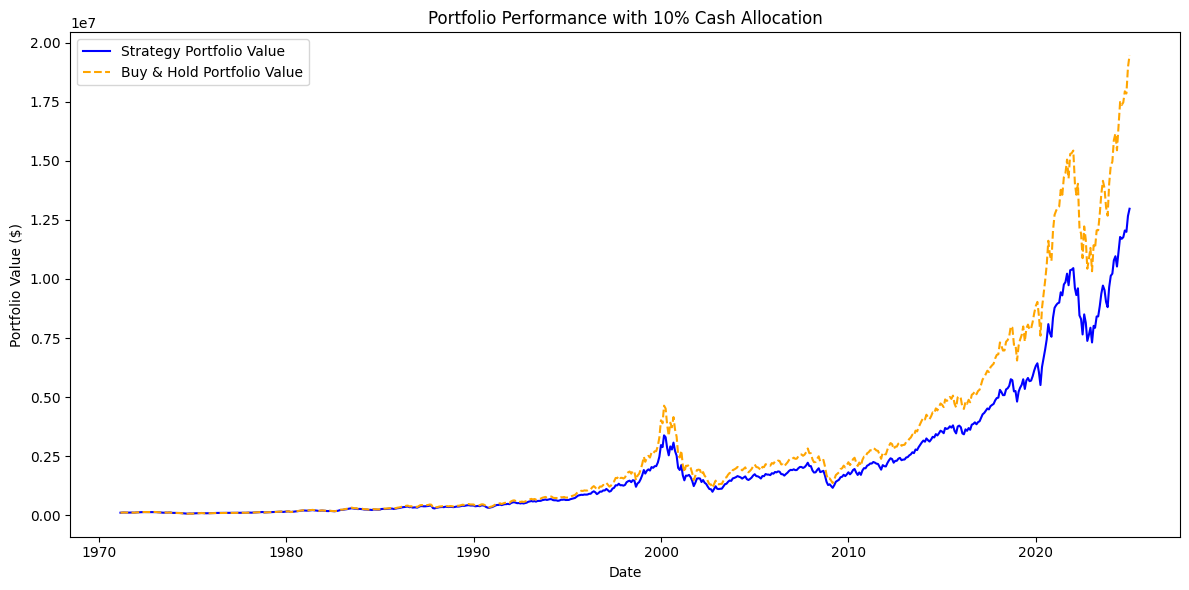

=========== Strategy Metrics ===========
Total Return (%): 12720.29
Annualized Return (%): 9.42
Initial Investment: 100000.00
Final Portfolio Value: 12974901.25
Maximum Portfolio Value: 12974901.25
Minimum Portfolio Value: 59371.03

=========== Buy & Hold Metrics ===========
Final Portfolio Value: 19475715.58
Total Return (%): 19475.72


In [ ]:
# Run the backtest
starting_capital=100000
performance, metrics = backtest_cash_strategy(ticker='^IXIC', starting_capital=starting_capital)

plot_performance_and_compare(performance, metrics)

[*********************100%***********************]  1 of 1 completed


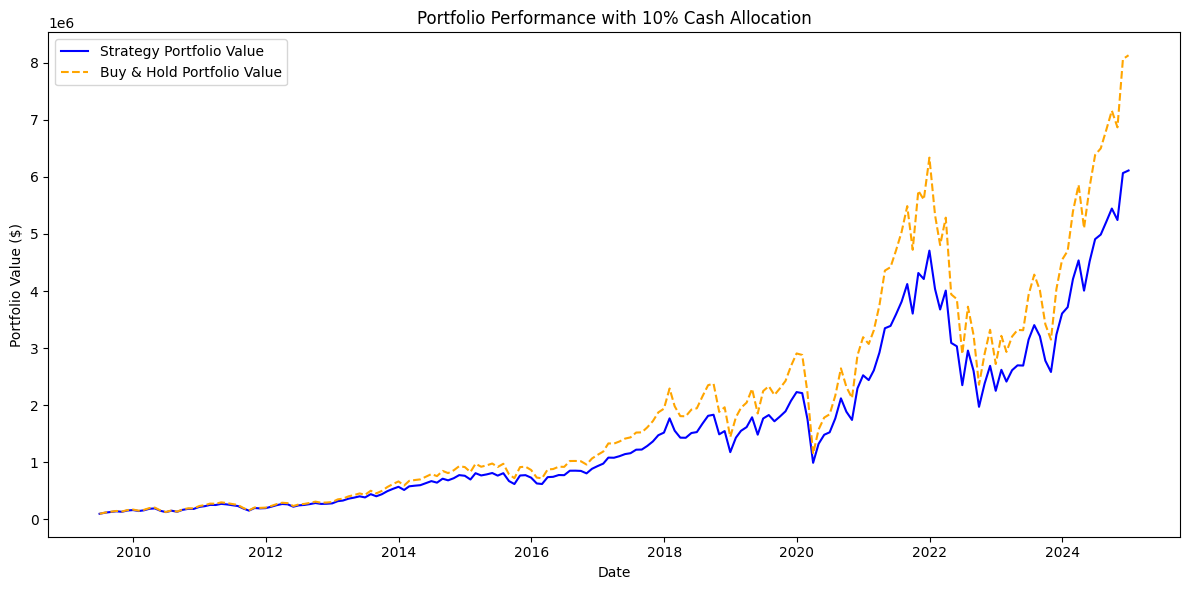

=========== Strategy Metrics ===========
Total Return (%): 6018.65
Annualized Return (%): 30.21
Initial Investment: 100000.00
Final Portfolio Value: 6111035.10
Maximum Portfolio Value: 6111035.10
Minimum Portfolio Value: 99875.55

=========== Buy & Hold Metrics ===========
Final Portfolio Value: 8128656.35
Total Return (%): 8128.66


In [ ]:
# Run the backtest
starting_capital=100000
performance, metrics = backtest_cash_strategy(ticker='UPRO', starting_capital=starting_capital, end_date=None)

plot_performance_and_compare(performance, metrics)